In [1]:
### Moses Giorgis

In [2]:
### CDS 303: Project 1

In [3]:
### October 4th 2020

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from IPython.display import Image

In [5]:
data = pd.read_csv('C:\\Users\\mgior\\Downloads\\p1_iris.csv', header = None)
df = pd.DataFrame()

df = pd.concat([data, df])
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df = df.rename(columns = {df.columns[0]: 'Sepal Length', df.columns[1]: 'Sepal Width', df.columns[2]: 'Petal Length', 
                    df.columns[3]: 'Petal Width', df.columns[4]: 'Class'})
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
Y = df['Class']
X = df.drop(['Class'] , axis = 1)

In [9]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =3)
clf = clf.fit(X,Y)

In [10]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


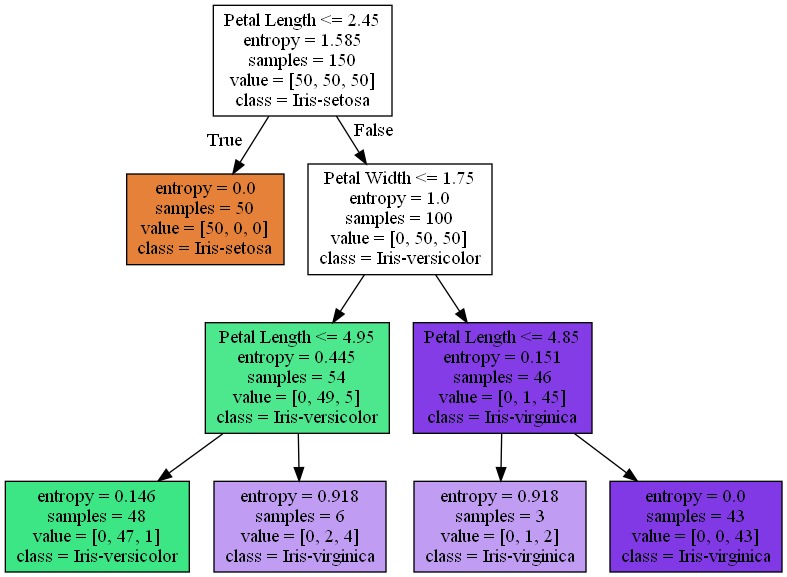

In [11]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [12]:
testData = [[0,0,0,0,'Iris-setosa'],
           [0,0,0,0,'Iris-setosa'],
           [0,0,0,0,'Iris-setosa'],
           [0,0,0,0,'Iris-setosa'],
            [1,1,1,1,'Iris-versicolor'],
            [1,1,1,1,'Iris-versicolor'],
            [1,1,1,1,'Iris-versicolor'],
           [1,1,1,1,'Iris-versicolor'],
           [2,2,2,2,'Iris-virginica'],
            [2,2,2,2,'Iris-virginica'],
            [2,2,2,2,'Iris-virginica'],
           [2,2,2,2,'Iris-virginica']] 

testData

[[0, 0, 0, 0, 'Iris-setosa'],
 [0, 0, 0, 0, 'Iris-setosa'],
 [0, 0, 0, 0, 'Iris-setosa'],
 [0, 0, 0, 0, 'Iris-setosa'],
 [1, 1, 1, 1, 'Iris-versicolor'],
 [1, 1, 1, 1, 'Iris-versicolor'],
 [1, 1, 1, 1, 'Iris-versicolor'],
 [1, 1, 1, 1, 'Iris-versicolor'],
 [2, 2, 2, 2, 'Iris-virginica'],
 [2, 2, 2, 2, 'Iris-virginica'],
 [2, 2, 2, 2, 'Iris-virginica'],
 [2, 2, 2, 2, 'Iris-virginica']]

In [13]:
testData = pd.DataFrame(testData, columns = df.columns)
testData

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,0,0,0,0,Iris-setosa
1,0,0,0,0,Iris-setosa
2,0,0,0,0,Iris-setosa
3,0,0,0,0,Iris-setosa
4,1,1,1,1,Iris-versicolor
5,1,1,1,1,Iris-versicolor
6,1,1,1,1,Iris-versicolor
7,1,1,1,1,Iris-versicolor
8,2,2,2,2,Iris-virginica
9,2,2,2,2,Iris-virginica


In [14]:
testY = testData['Class']
testX = testData.drop(['Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData[['Class']],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Class,Predicted Class
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-setosa
5,Iris-versicolor,Iris-setosa
6,Iris-versicolor,Iris-setosa
7,Iris-versicolor,Iris-setosa
8,Iris-virginica,Iris-setosa
9,Iris-virginica,Iris-setosa


In [15]:
### Testing Accuracy

In [16]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.33


In [17]:
## The model is alarmingly accurate. Checking for overfitting now

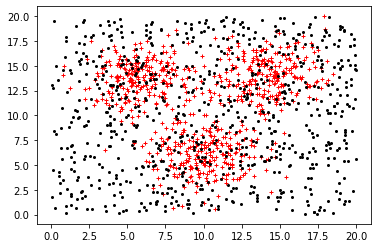

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

Text(0, 0.5, 'Accuracy')

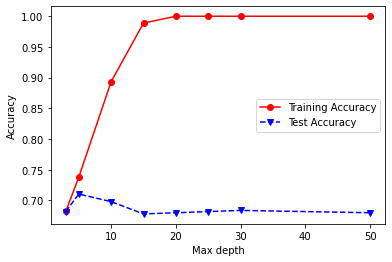

In [19]:
#########################################
# Training and Test set creation
#########################################

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=42)


#########################################
# Model fitting and evaluation
#########################################

maxdepths = [3,5,10,15,20,25,30,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [20]:
## This tells us that the model is clearly overfitting as max depth increases.
## This is because the training set accuracy is very high and the test set accuracy is decreasing. Low Bias / High Variance

In [21]:
###### Credit Problem

In [22]:
os.path.abspath('p1_credit_data.csv')

'C:\\Users\\mgior\\Downloads\\p1_credit_data.csv'

In [23]:
credit_data = pd.read_csv('C:\\Users\\mgior\\Downloads\\p1_credit_data.csv')
new_df = pd.DataFrame()
credit_df = pd.concat([new_df, credit_data])
credit_df.head()

,ID,WC_TA,RE_TA,EBIT_TA,MVE_BVTD,S_TA,Industry,Rating
0,62394,0.013,0.104,0.036,0.447,0.142,3,BB
1,48608,0.232,0.335,0.062,1.969,0.281,8,A
2,42444,0.311,0.367,0.074,1.935,0.366,1,A
3,48631,0.194,0.263,0.062,1.017,0.228,4,BBB
4,43768,0.121,0.413,0.057,3.647,0.466,12,AAA


In [24]:
credit_df.columns

Index(['ID', 'WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry',
       'Rating'],
      dtype='object')

In [25]:
## Establishing our Features (x) and Class (Y)

Y = credit_df['Rating']
X = credit_df.drop(['Rating', 'ID'], axis = 1)

In [26]:
X

,WC_TA,RE_TA,EBIT_TA,MVE_BVTD,S_TA,Industry
0,0.013,0.104,0.036,0.447,0.142,3
1,0.232,0.335,0.062,1.969,0.281,8
2,0.311,0.367,0.074,1.935,0.366,1
3,0.194,0.263,0.062,1.017,0.228,4
4,0.121,0.413,0.057,3.647,0.466,12
...,...,...,...,...,...,...
3927,0.136,0.247,0.049,1.016,0.264,2
3928,0.031,0.102,0.042,1.232,0.234,1
3929,-0.162,-0.777,-0.008,0.364,0.100,7
3930,-0.050,-0.023,0.029,0.568,0.139,9


In [27]:
## Splitting x and y into train and test datasets

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 2)

In [29]:
## Setting up 5-Fold cross validation to determine accuracy of datasets

In [30]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 4)

In [31]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(Y), 2))

0.6
0.2
0.2


In [32]:
# Great, our dataset is divided into an appropriate ratio of train,cv,test. Let's write out the datasets

In [34]:
x_train.to_csv('C:\\Users\\mgior\\Downloads\\tr_features.csv', index = False)
x_val.to_csv('C:\\Users\\mgior\\Downloads\\val_features.csv', index = False)
x_test.to_csv('C:\\Users\\mgior\\Downloads\\test_features.csv', index = False)

y_train.to_csv('C:\\Users\\mgior\\Downloads\\tr_class.csv', index = False)
y_val.to_csv('C:\\Users\\mgior\\Downloads\\val_class.csv', index = False)
y_test.to_csv('C:\\Users\\mgior\\Downloads\\test_class.csv', index = False)

In [35]:
tr_features = pd.read_csv('C:\\Users\\mgior\\Downloads\\tr_features.csv')
val_features = pd.read_csv('C:\\Users\\mgior\\Downloads\\val_features.csv')
test_features = pd.read_csv('C:\\Users\\mgior\\Downloads\\test_features.csv')
tr_features

,WC_TA,RE_TA,EBIT_TA,MVE_BVTD,S_TA,Industry
0,0.039,0.097,0.034,1.098,0.303,8
1,0.058,0.161,0.042,1.036,0.260,2
2,0.047,0.217,0.048,0.713,0.195,5
3,0.320,0.543,0.081,2.649,0.408,5
4,0.061,0.282,0.051,1.880,0.284,11
...,...,...,...,...,...,...
2354,0.078,0.287,0.049,2.360,0.268,9
2355,0.051,0.131,0.044,0.725,0.227,4
2356,0.020,0.100,0.042,0.879,0.145,12
2357,0.319,0.416,0.071,2.799,0.294,11


In [36]:
tr_class = pd.read_csv('C:\\Users\\mgior\\Downloads\\tr_class.csv')
val_class = pd.read_csv('C:\\Users\\mgior\\Downloads\\val_class.csv')
test_class = pd.read_csv('C:\\Users\\mgior\\Downloads\\test_class.csv')
tr_class

,Rating
0,BBB
1,BBB
2,BBB
3,AA
4,A
...,...
2354,A
2355,BB
2356,BBB
2357,AA


In [37]:
## Establishing 5 fold cross val

In [38]:
dtree = DecisionTreeClassifier()
kfold = cross_val_score(dtree, tr_features, tr_class.values.ravel(), cv = 5)
kfold

array([0.65466102, 0.67372881, 0.68008475, 0.60381356, 0.70063694])

In [39]:
## The average accuracy of our datasets is about 66%. Not necessarily ideal. Why is this?

In [40]:
# Parameter establishing and Hyperparameter creating/tuning:
### A couple of hyperparameters used to dictate the learning process of the model for the Random Forest Classifier are:
#### - max_depth: The number of decisions or the depth of the trees (length)

In [41]:
def print_results(results):
    print('Best Params: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean,std,params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3),round(std * 2, 3), params))

parameters = {
    'max_depth': [2, 10, 20, None]
}

In [42]:
cv = GridSearchCV(dtree, parameters, cv =5)
cv.fit(tr_features, tr_class)
print_results(cv)

Best Params: {'max_depth': 10}

0.511 (+/-0.021) for {'max_depth': 2}
0.698 (+/-0.059) for {'max_depth': 10}
0.659 (+/-0.057) for {'max_depth': 20}
0.655 (+/-0.064) for {'max_depth': None}


In [43]:
## Our best performing parameters are with a max depth of 1. 10, 2. 20, 3. None

In [44]:
dtree1 = DecisionTreeClassifier(max_depth = 10)
dtree1.fit(tr_features, tr_class)

DecisionTreeClassifier(max_depth=10)

In [45]:
y_pred = dtree1.predict(test_features)
accuracy = round(accuracy_score(test_class,y_pred),3)

print('MAX DEPTH: {} / ACCURACY: {} '.format(dtree1.max_depth, accuracy))

MAX DEPTH: 10 / ACCURACY: 0.684 


In [46]:
# So we know our best option is to go with a tree with a max depth of 10 and that our accuracy will be about 70%. 

## Let's run the tree

In [47]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
clf = clf.fit(X, Y)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.715577 to fit



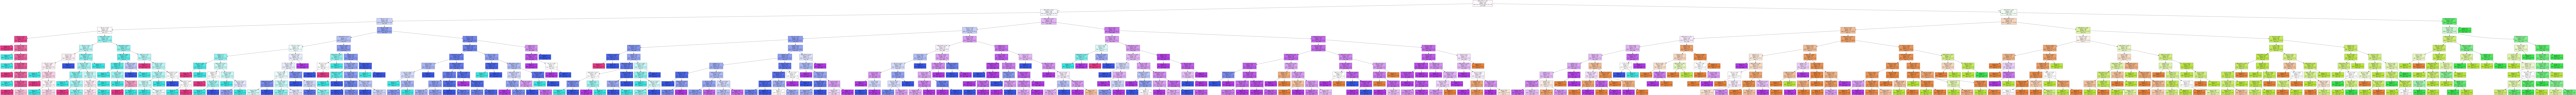

In [48]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['A','AA', 'AAA', 'B', 'BB', 'BBB', 'CCC'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Final_Corporate_Rating_Decision_tree = Image(graph.create_png())
Final_Corporate_Rating_Decision_tree

In [49]:
## This illustration displays the full calculation of corporate rating from financial ratios. Thank you for following along.